# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\DoctorVisits.csv")
df['age']=df['age']*100
df['age']=df['age'].map(int)
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,52,0.65,0,0,0,no,no,no,no,no


# Statistical Data

In [3]:
df.describe(include="all")

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
count,5190.000000,5190.000000,5190,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190,5190,5190,5190,5190
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no
freq,NaN,NaN,2702,NaN,NaN,NaN,NaN,NaN,2892,4968,4099,3098,4585
mean,2595.500000,0.301734,NaN,40.585934,0.583160,1.431985,0.861850,1.217534,NaN,NaN,NaN,NaN,NaN
std,1498.368279,0.798134,NaN,20.437323,0.368907,1.384152,2.887628,2.124266,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,19.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1298.250000,0.000000,NaN,22.000000,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2595.500000,0.000000,NaN,32.000000,0.550000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,3892.750000,0.000000,NaN,62.000000,0.900000,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
df['age'].unique()

array([19, 22, 27, 32, 37, 42, 47, 52, 56, 62, 67, 72], dtype=int64)

# Plot for visits of different ages

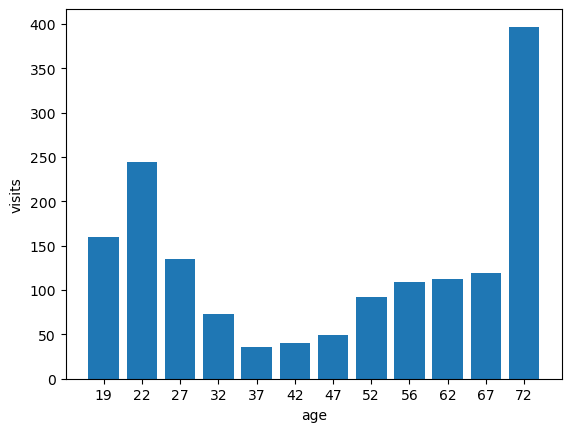

In [5]:
temp=df[['visits','age']]
temp=temp.groupby(['age'],as_index=False).sum()
temp['age']=temp['age'].map(str)
plt.bar(temp['age'],temp['visits'])
plt.xlabel("age")
plt.ylabel("visits")
plt.show()

# Plot for visits for different genders

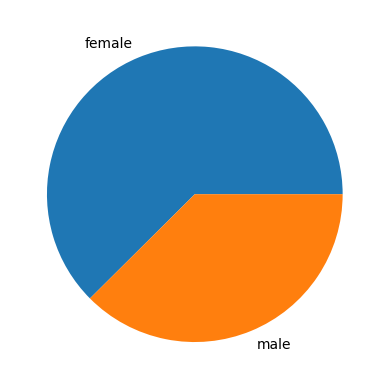

In [6]:
temp=df[['visits','gender','age']]
temp=temp.groupby(['gender'],as_index=False).sum()
plt.pie(list(temp['visits']),labels=list(temp['gender']))
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


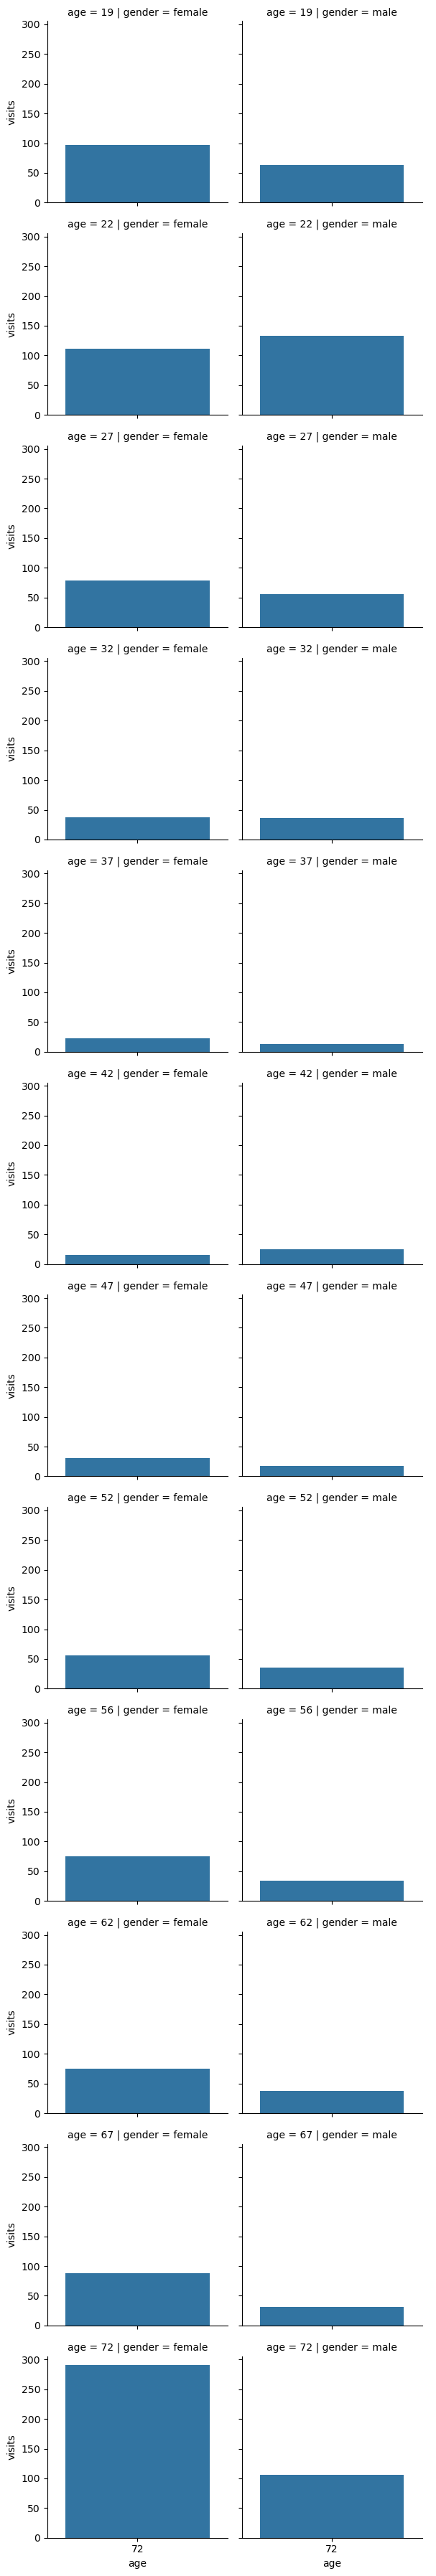

In [7]:
temp=df[['visits','age','gender']]
temp=temp.groupby(['age','gender'],as_index=False).sum()

g = sns.FacetGrid(temp,col='gender',row='age')
g.map(sns.barplot,'age','visits').add_legend()
plt.show()

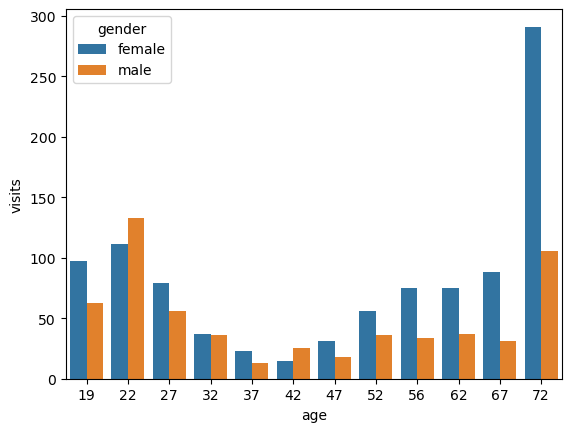

In [8]:
temp=df[['visits','age','gender']]
temp=temp.groupby(['age','gender'],as_index=False).sum()
temp['age']=temp['age'].map(str)
sns.barplot(data=temp,x='age',y='visits',hue='gender')
plt.show()

# Plot for illness for different ages

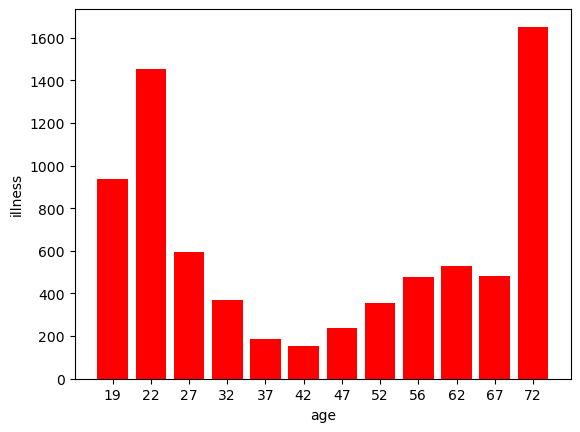

In [9]:
temp=df[['illness','age']]
temp=temp.groupby(['age'],as_index=False).sum()
temp['age']=temp['age'].map(str)
plt.bar(temp['age'],temp['illness'],color="red")
plt.ylabel("illness")
plt.xlabel("age")
plt.show()

# Plot for illness wrt age and gender 

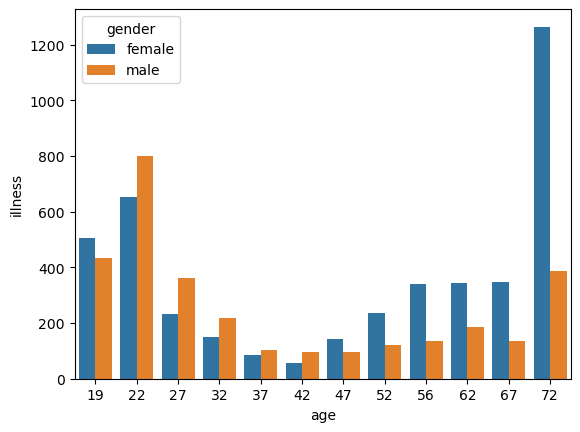

In [10]:
temp=df[['illness','age','gender']]
temp=temp.groupby(['age','gender'],as_index=False).sum()
temp['age']=temp['age'].map(str)
sns.barplot(data=temp,x='age',y='illness',hue='gender')
plt.show()

# Creating lists for categories and their count

In [11]:
cat=[]
count=[]

# Count for number of visits which come under the category of private 

In [12]:
df['private'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['private'].sum()
cat.append('private')
count.append(cou)
print("The number of visits which come under the category of the private are: ",cou)

The number of visits which come under the category of the private are:  2298


# Count for number of visits which come under the category of freepoor

In [13]:
df['freepoor'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['freepoor'].sum()
cat.append('freepoor')
count.append(cou)
print("The number of visits which come under the category of the freepoor are: ",cou)

The number of visits which come under the category of the freepoor are:  222


# Count for number of visits which come under the category of freerepat

In [14]:
df['freerepat'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['freerepat'].sum()
cat.append('freerepat')
count.append(cou)
print("The number of visits which come under the category of the freerepat are: ",cou)

The number of visits which come under the category of the freerepat are:  1091


# Count for number of visits which come under the category of nchronic

In [15]:
df['nchronic'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['nchronic'].sum()
cat.append('nchronic')
count.append(cou)
print("The number of visits which come under the category of the nchronic are: ",cou)

The number of visits which come under the category of the nchronic are:  2092


# Count for number of visits which come under the category of lchronic

In [16]:
df['lchronic'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['lchronic'].sum()
cat.append('lchronic')
count.append(cou)
print("The number of visits which come under the category of the lchronic are: ",cou)

The number of visits which come under the category of the lchronic are:  605


# Plot for visits for different categories 

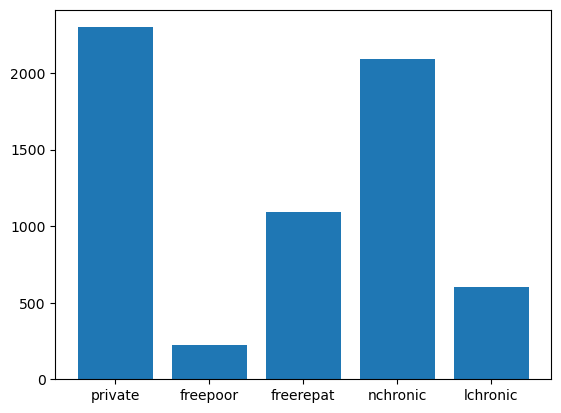

In [17]:
plt.bar(cat,count)
plt.show()